## Importing

In [193]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, f1_score

In [94]:
df = pd.read_excel(r"C:\Users\jacop\Desktop\CTG_raw.xlsx")

## Exploratory analysis

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2126 non-null   datetime64[ns]
 1   SegFile   2126 non-null   object        
 2   b         2126 non-null   int64         
 3   e         2126 non-null   int64         
 4   LBE       2126 non-null   int64         
 5   LB        2126 non-null   int64         
 6   AC        2126 non-null   int64         
 7   FM        2126 non-null   int64         
 8   UC        2126 non-null   int64         
 9   ASTV      2126 non-null   int64         
 10  MSTV      2126 non-null   float64       
 11  ALTV      2126 non-null   int64         
 12  MLTV      2126 non-null   float64       
 13  DL        2126 non-null   int64         
 14  DS        2126 non-null   int64         
 15  DP        2126 non-null   int64         
 16  DR        2126 non-null   int64         
 17  Width     2126

In [96]:
temp = df.iloc[:,4:-11] # selection of relevant features

In [97]:
temp.describe()
# values with potential outliers: AC-FM-UC-... Check for outliers

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [202]:
# Check for class dimensionality
temp.groupby("NSP").size()/len(temp)

# Noticed unbalanced classes

NSP
1    0.778457
2    0.138758
3    0.082785
dtype: float64

In [99]:
# checking for evident differences between classes

temp.groupby("NSP").median()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
NSP,,,,,,,,,,,,,,,,,,,,,
1,132.0,132.0,2.0,0.0,4.0,41.0,1.3,0.0,8.00,0.0,...,71.0,90.0,163.0,4.0,0.0,138.0,135.0,138.0,9.0,0.0
2,143.0,143.0,0.0,0.0,1.0,63.0,0.4,27.0,7.10,0.0,...,31.0,127.0,159.0,2.0,0.0,147.0,146.0,148.0,1.0,0.0
3,132.0,132.0,0.0,1.0,2.5,65.0,1.7,0.0,3.25,2.0,...,92.5,66.0,158.5,4.0,0.0,122.5,106.5,116.0,36.5,0.0


## Visualization

In [231]:
fig = px.box(temp, x="NSP", y="AC") #AC-FM-UC-MLTV
fig.show()

<AxesSubplot:>

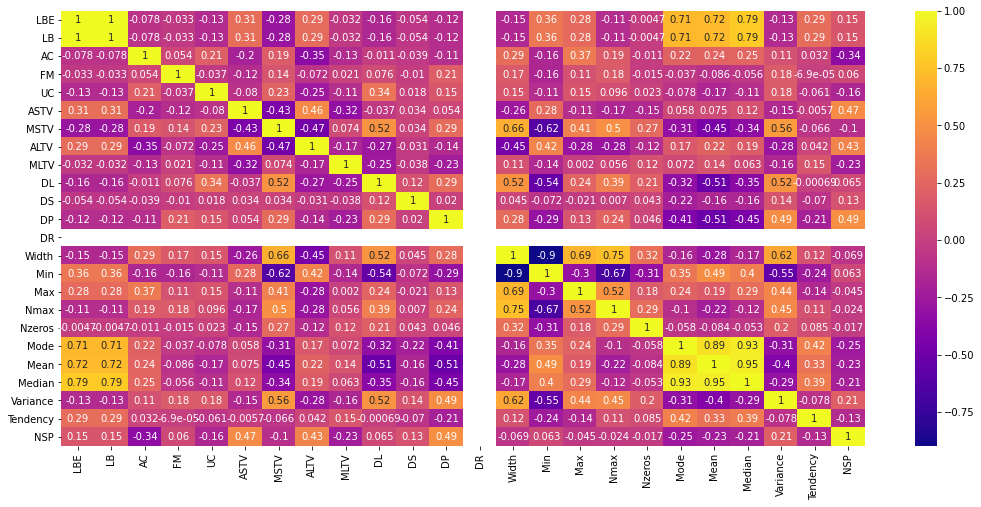

In [16]:
plt.figure(figsize=(18, 8))
sns.heatmap(temp.corr(), cmap = "plasma" ,annot=True)

# LBE and LB are the same
# LBE strongly correlated with mean and similars
# Mean and similars strongly correlated with each other
# DR = 0 everywhere

C:\Users\jacop\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



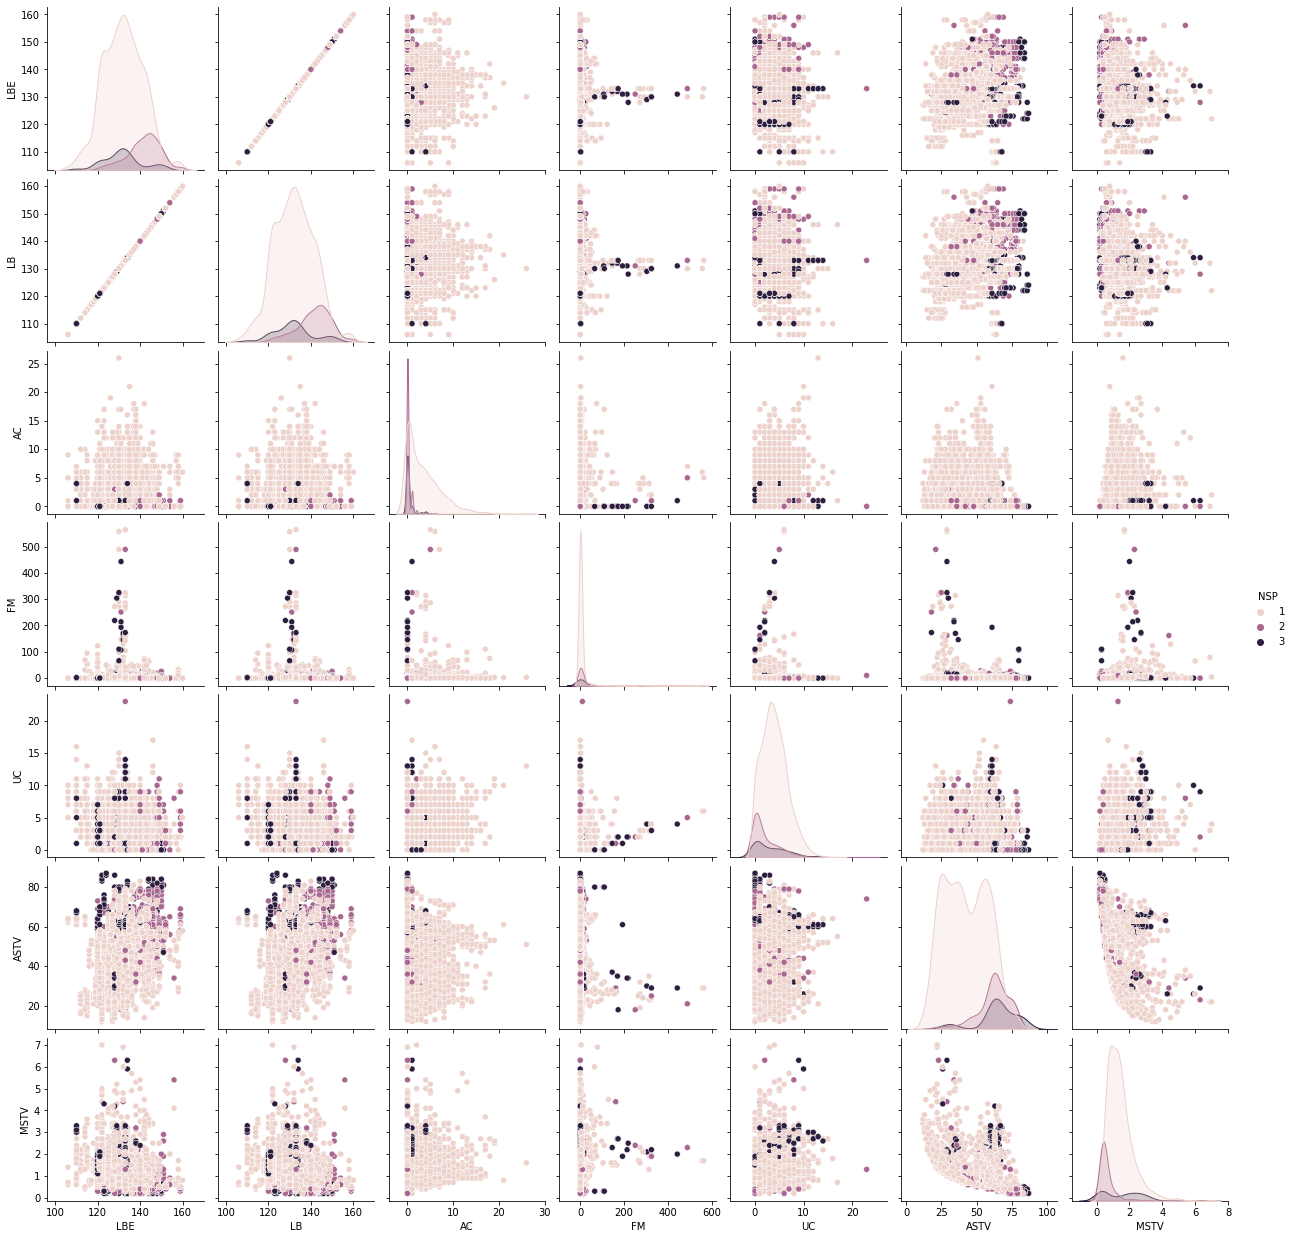

In [21]:
sns.pairplot(temp[['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', "NSP"]],hue='NSP',size=2.5)

C:\Users\jacop\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\jacop\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\jacop\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\jacop\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\jacop\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



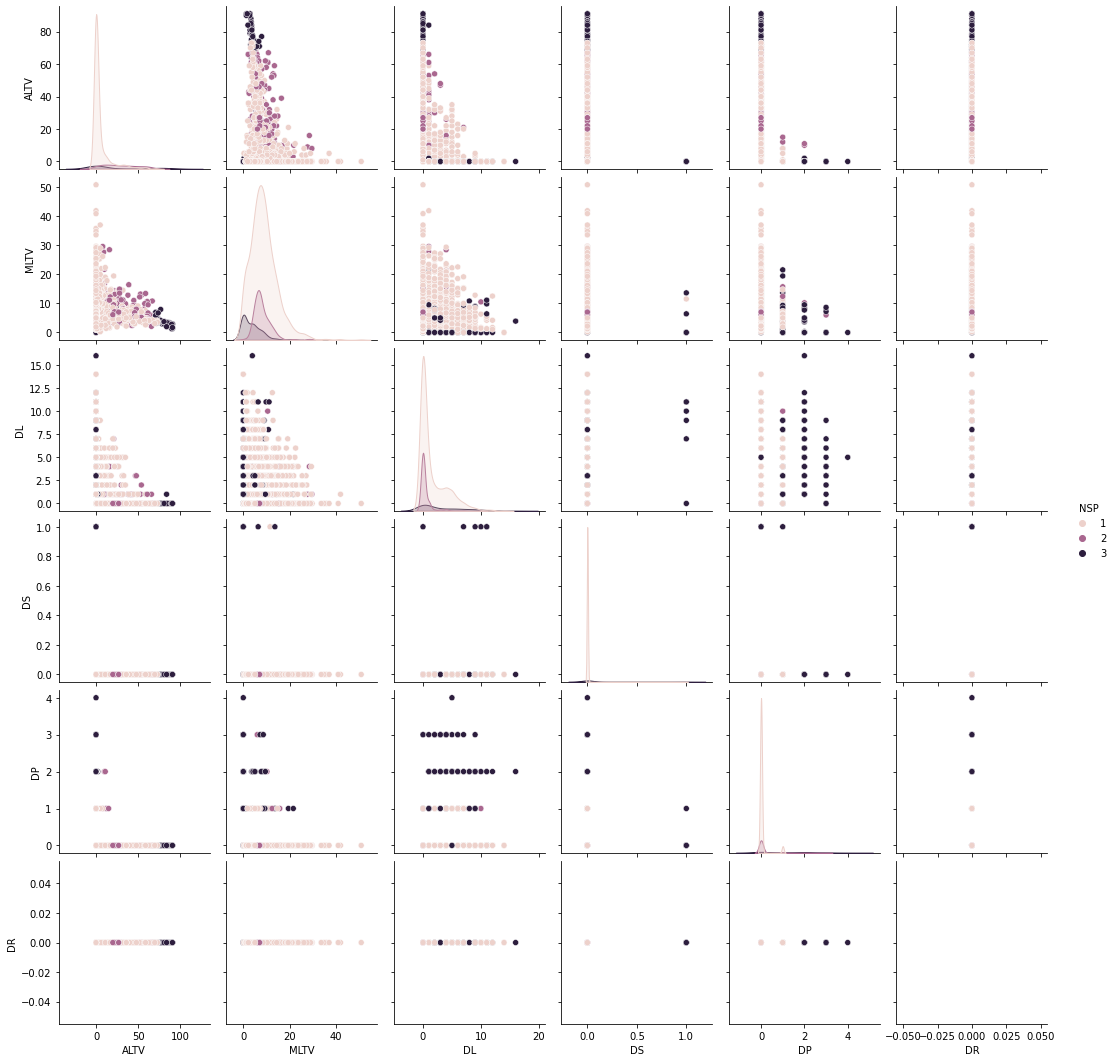

In [22]:
sns.pairplot(temp[['ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', "NSP"]],hue='NSP',size=2.5)

## Preprocessing

In [100]:
# drop redundant variables + DG

base = temp.iloc[:,1:]
base.drop("DR", axis=1, inplace=True)
base

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,0,0,...,137,177,4,0,153,150,152,2,0,2
2122,140,1,0,9,78,0.4,22,7.1,0,0,...,103,169,6,0,152,148,151,3,1,2
2123,140,1,0,7,79,0.4,20,6.1,0,0,...,103,170,5,0,153,148,152,4,1,2
2124,140,1,0,9,78,0.4,27,7.0,0,0,...,103,169,6,0,152,147,151,4,1,2


In [ ]:
# check and remove outliers

# either interquartile range or visualizations (scatter or box)

In [101]:
# Merging suspects and pathological

base1 = base
base1["NSP"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: NSP, dtype: float64

In [102]:
base1["NSP"] = np.where(base1["NSP"] >= 2, 2, 1)
base1["NSP"] = np.where(base1["NSP"] == 1, 0, 1)
base1["NSP"].describe()

count    2126.000000
mean        0.221543
std         0.415383
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: NSP, dtype: float64

In [109]:
# All that's left is the standardization

base_std = scaler.fit_transform(base1.iloc[:,:-1])

base_std = pd.DataFrame(base_std, columns=base.iloc[:,:-1].columns)

In [110]:
# Train-test split with stratification

x_train1, x_test1, y_train1, y_test1 = train_test_split(base.iloc[:,:-1], base1["NSP"], stratify=base1["NSP"], test_size=0.3) # Not std, 2 class
x_train2, x_test2, y_train2, y_test2 = train_test_split(base_std, base1["NSP"], stratify=base1["NSP"], test_size=0.3) # standardized, 2 class

## Models

### First Model: 2 class problem (Normal - Suspect) - no std

In [111]:
# baseline model with all non-standardized variables

knn1 = KNeighborsClassifier()
rfc1 = RandomForestClassifier()
svc1 = svm.SVC()

In [206]:
knn1.fit(x_train1,y_train1)
rfc1.fit(x_train1,y_train1)
svc1.fit(x_train1,y_train1)

knn1_pred = knn1.predict(x_test1)
rfc1_pred = rfc1.predict(x_test1)
svc1_pred = svc1.predict(x_test1)

In [207]:
accuracy_score(knn1_pred, y_test1),accuracy_score(rfc1_pred, y_test1),accuracy_score(svc1_pred, y_test1)

(0.9169278996865203, 0.9545454545454546, 0.877742946708464)

In [208]:
recall_score(knn1_pred, y_test1),recall_score(rfc1_pred, y_test1),recall_score(rfc1_pred, y_test1)

(0.94, 0.9444444444444444, 0.9444444444444444)

In [209]:
confusion_matrix(knn1_pred, y_test1),confusion_matrix(rfc1_pred, y_test1),confusion_matrix(rfc1_pred, y_test1)

(array([[491,  47],
        [  6,  94]], dtype=int64),
 array([[490,  22],
        [  7, 119]], dtype=int64),
 array([[490,  22],
        [  7, 119]], dtype=int64))

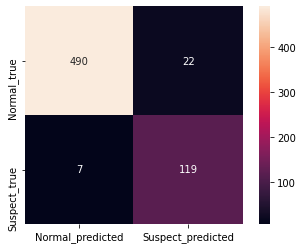

In [222]:
labels = ['Normal_predicted', 'Suspect_predicted','Normal_true', 'Suspect_true']


plt.figure()
ax = sns.heatmap(confusion_matrix(rfc1_pred, y_test1), square=True, xticklabels=labels[:2], yticklabels=labels[2:], annot=True, fmt='.00f')   

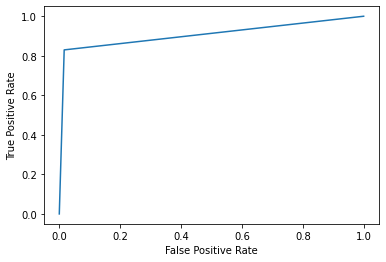

In [152]:
fpr, tpr, _ = metrics.roc_curve(y_test1,  rfc1_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Second Model: 2 class problem (Normal - Suspect) - std

In [116]:
knn2 = KNeighborsClassifier()
rfc2 = RandomForestClassifier()
svc2 = svm.SVC()

knn2.fit(x_train2,y_train2)
rfc2.fit(x_train2,y_train2)
svc2.fit(x_train2,y_train2)

knn2_pred = knn2.predict(x_test2)
rfc2_pred = rfc2.predict(x_test2)
svc2_pred = svc2.predict(x_test2)

In [211]:
accuracy_score(knn2_pred, y_test2),accuracy_score(rfc2_pred, y_test2),accuracy_score(svc2_pred, y_test2)

(0.9247648902821317, 0.9686520376175548, 0.945141065830721)

In [210]:
recall_score(knn2_pred, y_test2),recall_score(rfc2_pred, y_test2),recall_score(svc2_pred, y_test2)

(0.8907563025210085, 0.9618320610687023, 0.9344262295081968)

In [212]:
confusion_matrix(knn2_pred, y_test2),confusion_matrix(rfc2_pred, y_test2),confusion_matrix(svc2_pred, y_test2)

(array([[484,  35],
        [ 13, 106]], dtype=int64),
 array([[492,  15],
        [  5, 126]], dtype=int64),
 array([[489,  27],
        [  8, 114]], dtype=int64))

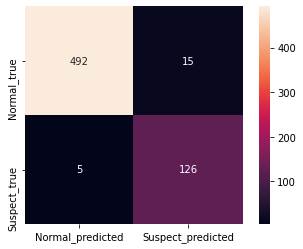

In [223]:
labels = ['Normal_predicted', 'Suspect_predicted','Normal_true', 'Suspect_true']


plt.figure()
ax = sns.heatmap(confusion_matrix(rfc2_pred, y_test2), square=True, xticklabels=labels[:2], yticklabels=labels[2:], annot=True, fmt='.00f')  

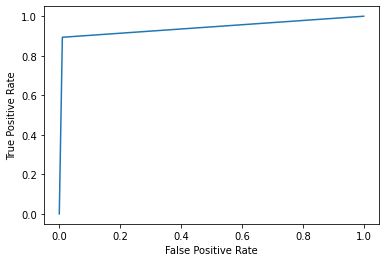

In [153]:
fpr, tpr, _ = metrics.roc_curve(y_test2,  rfc2_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Third Model: 3 class problem (Normal - Suspect - Pathologic) - std

In [120]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(base_std, temp["NSP"], stratify=temp["NSP"], test_size=0.3) # standardized

In [155]:
knn3 = KNeighborsClassifier()
rfc3 = RandomForestClassifier()
svc3 = svm.SVC()

knn3.fit(x_train3,y_train3)
rfc3.fit(x_train3,y_train3)
svc3.fit(x_train3,y_train3)

knn3_pred = knn3.predict(x_test3)
rfc3_pred = rfc3.predict(x_test3)
svc3_pred = svc3.predict(x_test3)

In [156]:
accuracy_score(knn3_pred, y_test3),accuracy_score(rfc3_pred, y_test3),accuracy_score(svc3_pred, y_test3)

(0.9059561128526645, 0.9404388714733543, 0.8981191222570533)

In [157]:
confusion_matrix(knn3_pred, y_test3),confusion_matrix(rfc3_pred, y_test3),confusion_matrix(svc3_pred, y_test3)

(array([[486,  29,   7],
        [ 11,  55,   9],
        [  0,   4,  37]], dtype=int64),
 array([[493,  26,   2],
        [  4,  61,   5],
        [  0,   1,  46]], dtype=int64),
 array([[477,  27,   6],
        [ 20,  60,  11],
        [  0,   1,  36]], dtype=int64))

## Tuning best model

In [124]:
rfc0 = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]   
}

In [125]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc0,parameters,cv=5)
cv.fit(base_std,base1["NSP"].values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [126]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 100}


0.849 + or -0.092 for the {'max_depth': 2, 'n_estimators': 5}
0.857 + or -0.074 for the {'max_depth': 2, 'n_estimators': 10}
0.849 + or -0.085 for the {'max_depth': 2, 'n_estimators': 50}
0.85 + or -0.088 for the {'max_depth': 2, 'n_estimators': 100}
0.86 + or -0.085 for the {'max_depth': 2, 'n_estimators': 250}
0.863 + or -0.098 for the {'max_depth': 4, 'n_estimators': 5}
0.883 + or -0.078 for the {'max_depth': 4, 'n_estimators': 10}
0.86 + or -0.098 for the {'max_depth': 4, 'n_estimators': 50}
0.86 + or -0.098 for the {'max_depth': 4, 'n_estimators': 100}
0.865 + or -0.089 for the {'max_depth': 4, 'n_estimators': 250}
0.88 + or -0.052 for the {'max_depth': 8, 'n_estimators': 5}
0.86 + or -0.071 for the {'max_depth': 8, 'n_estimators': 10}
0.868 + or -0.085 for the {'max_depth': 8, 'n_estimators': 50}
0.882 + or -0.066 for the {'max_depth': 8, 'n_estimators': 100}
0.882 + or -0.068 for the {'max_depth': 8, 'n_estimators': 2

In [188]:
rfc_final = RandomForestClassifier(n_estimators=32, max_depth=100) 

In [189]:
rfc_final.fit(x_train2,y_train2)
final_pred = rfc_final.predict(x_test2)

In [190]:
accuracy_score(final_pred, y_test2), precision_score(final_pred, y_test2), recall_score(final_pred, y_test2), confusion_matrix(final_pred, y_test2)

(0.9702194357366771,
 0.900709219858156,
 0.9621212121212122,
 array([[492,  14],
        [  5, 127]], dtype=int64))

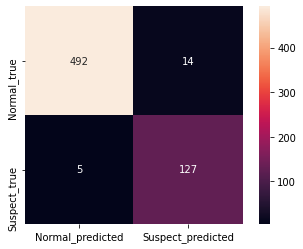

In [225]:
labels = ['Normal_predicted', 'Suspect_predicted','Normal_true', 'Suspect_true']


plt.figure()
ax = sns.heatmap(confusion_matrix(final_pred, y_test2), square=True, xticklabels=labels[:2], yticklabels=labels[2:], annot=True, fmt='.00f') 

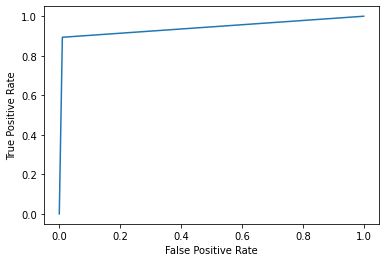

In [187]:
fpr, tpr, _ = metrics.roc_curve(y_test2,  final_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
## Attempt on feature reduction and weighting for class imbalance

In [130]:
feature_names = [f"feature {i}" for i in range(x_train2.shape[1])]

In [131]:
rfc_final.feature_importances_
forest_importances = pd.Series(rfc_final.feature_importances_, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rfc_final.estimators_], axis=0)

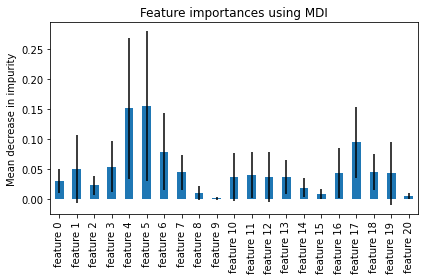

In [132]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [148]:
# Checking low importance variables

x_train2.iloc[:,15] # DL-DS-NZEROS-TENDENCY

1057   -0.458444
481    -0.458444
836     0.958201
739     0.958201
1903    2.374846
          ...   
1490    0.958201
1717   -0.458444
2015    0.958201
1876   -0.458444
1014   -0.458444
Name: Nzeros, Length: 1488, dtype: float64

In [163]:
# dropping low importance variables

base_std_selected = base_std.drop(["DL","DS","Nzeros","Tendency"],axis=1)
base_std_selected

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DP,Width,Min,Max,Nmax,Mode,Mean,Median,Variance
0,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,-1.028560,-0.27153,-0.165507,-1.068562,-2.119592,-0.701397,-1.065614,0.153270,-1.181642,1.870569
1,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,0.393176,-0.27153,1.529124,-0.865539,1.893794,0.655137,0.216638,0.089126,0.132038,-0.234998
2,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,0.926327,-0.27153,1.529124,-0.865539,1.893794,0.316003,0.216638,0.024982,-0.006244,-0.200481
3,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,2.632411,-0.27153,1.195333,-1.373097,0.333033,2.350804,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,2.081488,-0.27153,1.195333,-1.373097,0.333033,1.672537,-0.027600,0.089126,-0.006244,-0.269516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,-0.175519,-0.27153,-0.781736,1.469229,0.723223,-0.023130,0.949354,0.987141,0.961731,-0.580173
2122,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,-0.193290,-0.27153,-0.114154,0.318764,0.277292,0.655137,0.888294,0.858853,0.892590,-0.545656
2123,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,-0.371007,-0.27153,-0.088478,0.318764,0.333033,0.316003,0.949354,0.858853,0.961731,-0.511138
2124,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,-0.211062,-0.27153,-0.114154,0.318764,0.277292,0.655137,0.888294,0.794709,0.892590,-0.511138


In [164]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(base_std_selected.iloc[:,:-1], base1["NSP"], stratify=base1["NSP"], test_size=0.3) # standardized

In [191]:
# adding class imbalance

ratio = y_train4.value_counts()[0]/y_train4.value_counts()[1]
ratio

3.5090909090909093

In [229]:
rfc_final2 = RandomForestClassifier(n_estimators=32, max_depth=100, class_weight={1:ratio,0:1})

rfc_final2.fit(x_train4,y_train4)
final_pred2 = rfc_final2.predict(x_test4)

accuracy_score(final_pred2, y_test4), precision_score(final_pred2, y_test4), recall_score(final_pred2, y_test4), confusion_matrix(final_pred2, y_test4)

(0.9545454545454546,
 0.8226950354609929,
 0.9666666666666667,
 array([[493,  25],
        [  4, 116]], dtype=int64))

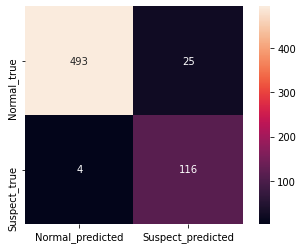

In [230]:
labels = ['Normal_predicted', 'Suspect_predicted','Normal_true', 'Suspect_true']


plt.figure()
ax = sns.heatmap(confusion_matrix(final_pred2, y_test4), square=True, xticklabels=labels[:2], yticklabels=labels[2:], annot=True, fmt='.00f') 

In [ ]:
# Probably better with all variables
# This last model predicted wrongfully "normal" only 3 "suspect"(false negative), however higher false "suspect" shotcalling (false positive)
# One more "suspect" patient identified converts in 7 more checked (21-14)

In [171]:
y_test4.describe()

count    638.000000
mean       0.221003
std        0.415248
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: NSP, dtype: float64

## Results:

The best model is "rfc_final", which is the best in terms of accuracy, given the precision-recall tradeoff

In [176]:
importances = rfc_final.feature_importances_
features = x_test2.keys()
features_importance = pd.DataFrame(importances, index=features, columns=['Importance'])
sorted_feat_imp = features_importance.sort_values('Importance', axis=0, ascending=False)

print(sorted_feat_imp)

          Importance
ASTV        0.135226
MSTV        0.133858
ALTV        0.121331
Mean        0.071507
DP          0.069118
UC          0.058495
Mode        0.054459
Median      0.048681
AC          0.048609
Min         0.044867
Width       0.042650
LB          0.031605
MLTV        0.031543
Variance    0.026692
Max         0.022956
FM          0.022835
Nmax        0.015690
Tendency    0.007090
Nzeros      0.006420
DL          0.005044
DS          0.001324


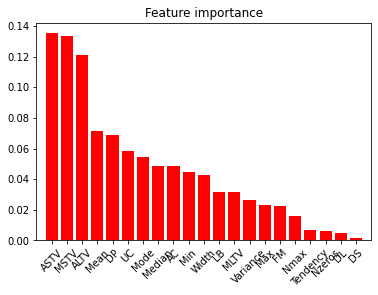

In [178]:
plt.figure()
plt.title('Feature importance')
tmp = sorted_feat_imp['Importance'].values.tolist()
plt.bar(range(x_test2.shape[1]), tmp, color='r' )
plt.xticks(range(x_test2.shape[1]), sorted_feat_imp.index, rotation=45, ha='center')
plt.xlim(-1, x_test2.shape[1])
plt.show()

In [201]:
# confonting the 3 available models:

print("Baseline: {};".format(f1_score(rfc2_pred, y_test2)),
        "GridSearch: {};".format(f1_score(final_pred, y_test2)),
        "Tuned: {};".format(f1_score(final_pred2, y_test4)) )

Baseline: 0.9264705882352942; GridSearch: 0.9304029304029305; Tuned: 0.9090909090909092;
